### 1. 라이브러리 선언

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [10]:
import seaborn as sns

In [3]:
## 모델 선언
from sklearn.cluster import KMeans

### 데이터 불러오기

In [5]:
stData = pd.read_csv("../dataset/student_middle_result.csv")

In [6]:
stData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ST_NO   26 non-null     object
 1   SW      26 non-null     int64 
 2   DB      26 non-null     int64 
 3   AND     26 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 960.0+ bytes


In [7]:
stData.shape

(26, 4)

In [ ]:
## kaggle -> EDA
## EDA는 다만 탐색하는


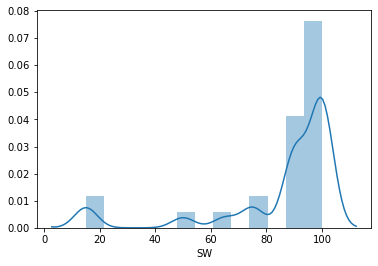

In [11]:
sns.distplot(stData.SW)

In [9]:
stData.describe()

,SW,DB,AND
count,26.000000,26.000000,26.000000
mean,85.384615,69.807692,50.230769
std,24.162909,31.764155,29.906933
min,15.000000,10.000000,0.000000
25%,90.000000,46.250000,30.750000
50%,92.500000,80.000000,47.500000
75%,100.000000,100.000000,66.750000
max,100.000000,100.000000,100.000000


### 1. 타입 통합 / 숫자형 컬럼 추가

In [15]:
stData.astype({"SW":int,
            "DB": int,
            "AND":int})

,ST_NO,SW,DB,AND
0,ST0001,95,30,0
1,ST0002,50,50,0
2,ST0003,15,30,15
3,ST0004,90,50,20
4,ST0005,75,20,20
5,ST0006,100,80,30
6,ST0007,15,10,30
7,ST0008,100,100,33
8,ST0009,65,60,35
9,ST0010,90,20,38


### 2. 모델 선언/학습

In [20]:
featuresColumns = ["SW","DB","AND"]

In [21]:
features = stData.loc[:,featuresColumns]

In [24]:
features

,SW,DB,AND
0,95,30,0
1,50,50,0
2,15,30,15
3,90,50,20
4,75,20,20
5,100,80,30
6,15,10,30
7,100,100,33
8,65,60,35
9,90,20,38


In [25]:
model_method = KMeans(random_state=1, n_clusters=2)
model = model_method.fit(features)

In [ ]:
#stopping rule 1. 더이상팀이 바뀌지 않을때
#stooping rule 2. SSE(Sum of Squre Error) - center 기준으로 더했을때 합이 최소가 되는 

### 3. 예측

In [27]:
predictValue = model.predict(features)

In [28]:
len(predictValue)

26

In [30]:
featuresIndex = features.index

In [32]:
featuresAll = stData.loc[featuresIndex]

In [33]:
featuresAll["CLUSTER"] = predictValue

In [34]:
featuresAll

,ST_NO,SW,DB,AND,CLUSTER
0,ST0001,95,30,0,0
1,ST0002,50,50,0,0
2,ST0003,15,30,15,0
3,ST0004,90,50,20,0
4,ST0005,75,20,20,0
5,ST0006,100,80,30,1
6,ST0007,15,10,30,0
7,ST0008,100,100,33,1
8,ST0009,65,60,35,0
9,ST0010,90,20,38,0


### 4. 검증

### 5. 시각화

In [41]:
indianDataPath = "https://raw.githubusercontent.com/hyokwan/python-lecture/master/dataset/pima-indians-diabetes.csv"

In [43]:
indianData = pd.read_csv(indianDataPath)

In [44]:
indianData

,pregnancies,glucose,diastolic,trceps,insulin,bmi,dpf,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [ ]:
classification

- multiply Classification (DecisionClassfier, SVM, KNN)
- binary Classification (Logistic Regressor)

In [45]:
# 머신러인, 타임시지르 모델, 딥러닝

In [48]:
import statsmodels.formula.api as smf

In [73]:
from sklearn.linear_model import LogisticRegression

In [51]:
ml = smf.logit(
formula="diabetes ~ glucose+bmi+age+insulin",
data = indianData).fit()

Optimization terminated successfully.
         Current function value: 0.490871
         Iterations 6


In [52]:
ml.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               diabetes   No. Observations:                  768
Model:                          Logit   Df Residuals:                      763
Method:                           MLE   Df Model:                            4
Date:                Tue, 15 Jun 2021   Pseudo R-squ.:                  0.2411
Time:                        16:34:03   Log-Likelihood:                -376.99
converged:                       True   LL-Null:                       -496.74
Covariance Type:            nonrobust   LLR p-value:                 1.185e-50
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -8.5207      0.678    -12.576      0.000      -9.849      -7.193
glucose        0.0340      0.004      9.572      0.000       0.027       0.041
bmi            0.0841      0.014      6.120      0.000       0.057       0.111
age            0.0286      0.008      3.707      0.000       0.013       0.044
insulin       -0.0010      0.001     -1.312      0.189      -0.003       0.001
==============================================================================
"""

In [72]:
features= ["glucose","bmi","age","insulin"]

label = ["diabetes"]

from sklearn.model_selection import train_test_split

trainingDataFeatures, \
testDataFeatures,\
traningDataLabel,\
testDataLabel = \
train_test_split( indianData.loc[:,features],
                indianData.loc[:,label], random_state=10)

print(trainingDataFeatures.shape)
print(testDataFeatures.shape)
print(traningDataLabel.shape)
print(testDataLabel.shape)

model_method = LogisticRegression()

modelFit = model_method.fit(trainingDataFeatures, traningDataLabel)

predictValue = modelFit.predict(testDataFeatures)

testDataIndex = testDataFeatures.index

testDataAll = indianData.loc[testDataIndex]

testDataAll["PREDICT"] = predictValue

testDataAll

(576, 4)
(192, 4)
(576, 1)
(192, 1)


C:\Users\SMART-09\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


,pregnancies,glucose,diastolic,trceps,insulin,bmi,dpf,age,diabetes,PREDICT
568,4,154,72,29,126,31.3,0.338,37,0,1
620,2,112,86,42,160,38.4,0.246,28,0,0
456,1,135,54,0,0,26.7,0.687,62,0,1
197,3,107,62,13,48,22.9,0.678,23,1,0
714,3,102,74,0,0,29.5,0.121,32,0,0
...,...,...,...,...,...,...,...,...,...,...
613,6,105,80,28,0,32.5,0.878,26,0,0
562,1,87,68,34,77,37.6,0.401,24,0,0
587,6,103,66,0,0,24.3,0.249,29,0,0
413,1,143,74,22,61,26.2,0.256,21,0,0
